# EDA  

In [ ]:
!git clone https://github.com/sinbaramDL/dacon-credit-card-defaults-detection

In [ ]:
cd /content/dacon-credit-card-defaults-detection

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# seed 설정
np.random.seed(42)

sns.set_style("white")
sns.set_context("talk")

# 한글 사용 설정 
plt.rcParams['axes.unicode_minus'] = False

In [31]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [32]:
train.describe(include='all')

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
count,26457.000000,26457,26457,26457,26457.000000,2.645700e+04,26457,26457,26457,26457,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,18286,26457.000000,26457.000000,26457.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN
freq,NaN,17697,16410,17830,NaN,NaN,13645,17995,18196,23653,NaN,NaN,NaN,NaN,NaN,NaN,4512,NaN,NaN,NaN
mean,13228.000000,NaN,NaN,NaN,0.428658,1.873065e+05,NaN,NaN,NaN,NaN,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,NaN,2.196848,-26.123294,1.519560
std,7637.622372,NaN,NaN,NaN,0.747326,1.018784e+05,NaN,NaN,NaN,NaN,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,NaN,0.916717,16.559550,0.702283
min,0.000000,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,-60.000000,0.000000
25%,6614.000000,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-39.000000,1.000000
50%,13228.000000,NaN,NaN,NaN,0.000000,1.575000e+05,NaN,NaN,NaN,NaN,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-24.000000,2.000000
75%,19842.000000,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,-12.000000,2.000000


In [33]:
train['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [35]:
train.head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
7,7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14896,-5420,1,0,0,1,Drivers,2.0,-53.0,0.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
9,9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-15785,-1308,1,0,0,0,Medicine staff,2.0,-5.0,2.0


In [ ]:
sns.pairplot(train)
plt.title('Relationships between Features')
plt.show()

# Feature Engineering

In [39]:
train = train.drop(["index"], axis=1)
test = test.drop(["index"], axis=1)

In [40]:
train[train.duplicated()]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,1,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
716,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,1,0,0,0,NaN,1.0,-4.0,1.0
877,M,Y,N,2,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-12240,-4663,1,0,0,0,Core staff,4.0,-24.0,2.0
1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,365243,1,0,0,0,NaN,2.0,-35.0,2.0
1315,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,-29.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26374,F,Y,N,0,112500.0,Working,Secondary / secondary special,Married,Municipal apartment,-17372,-978,1,0,1,0,Sales staff,2.0,-15.0,1.0
26393,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-14122,-3383,1,0,0,0,Managers,2.0,-31.0,2.0
26428,F,Y,Y,2,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12745,-525,1,0,0,1,Core staff,4.0,-23.0,1.0
26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0


In [41]:
train.drop_duplicates(subset=None, inplace=True)

In [42]:
train["FLAG_MOBIL"].value_counts()

1    24823
Name: FLAG_MOBIL, dtype: int64

In [43]:
train = train.drop(["FLAG_MOBIL"], axis=1)
test = test.drop(["FLAG_MOBIL"], axis=1)
train['occyp_type'].fillna('OTHER',inplace = True)
test['occyp_type'].fillna('OTHER',inplace = True)

## Feature Creation

In [44]:
data = pd.concat([train, test], axis=0)
print(train.shape)
print(test.shape)
print(data.shape)

(24823, 18)
(10000, 17)
(34823, 18)


### occyp_type을 credit 평균치로 환산

In [45]:
occyp_mean_score = train.groupby(['occyp_type']).mean()['credit']
data['occyp_mean_score'] = data['occyp_type'].apply(lambda x : occyp_mean_score[x])
data[["occyp_mean_score", "occyp_type"]].describe(include='all')

,occyp_mean_score,occyp_type
count,34823.000000,34823
unique,NaN,19
top,NaN,OTHER
freq,NaN,10765
mean,1.514510,NaN
std,0.025683,NaN
min,1.350000,NaN
25%,1.497649,NaN
50%,1.520257,NaN
75%,1.521476,NaN


### houst_type credit 평균치로 환산

In [46]:
occyp_mean_score = train.groupby(['house_type']).mean()['credit']
data['house_mean_score'] = data['house_type'].apply(lambda x : occyp_mean_score[x])
data[["house_mean_score", "house_type"]].describe(include='all')

,house_mean_score,house_type
count,34823.000000,34823
unique,NaN,6
top,NaN,House / apartment
freq,NaN,31065
mean,1.514444,NaN
std,0.012574,NaN
min,1.422500,NaN
25%,1.516464,NaN
50%,1.516464,NaN
75%,1.516464,NaN


### family related feature creation
1. 전체소득 / 가족수 --> 인당 인컴 수준
2. family_size - childnum --> 어른 수 linear해서 큰의미가 없을 것 같긴하지만 3을 위해서 활용
3. 전체소득 / 2에서 나온 것 --> 어른당 얼마정도 사용가능한지 연산

In [47]:
counts, bin_dividers = np.histogram(data['income_total'], bins=7)
data['income_total'] = pd.factorize(pd.cut(data['income_total'], bins = bin_dividers, include_lowest=True, labels=[0,1,2,3,4,5,6]))[0] 
data['total_income/famliy_size'] = data['income_total']/(data['family_size']+1)
data['adult'] = data['family_size'] - data['child_num']
data['adult'] = data['adult'].apply(lambda x : x if x > 0.0 else 0)
data['total_income/adult'] = data['income_total'] / (data['adult'] + 1)
data[["income_total", "total_income/famliy_size", "adult"]].describe(include='all')

,income_total,total_income/famliy_size,adult
count,34823.000000,34823.000000,34823.000000
mean,0.199265,0.066308,1.767855
std,0.456867,0.157829,0.422751
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,2.000000
75%,0.000000,0.000000,2.000000
max,6.000000,2.000000,2.000000


### DAYS_BIRTH, DAYS_EMPLOYED, begin_month 처리

In [48]:
data["DAYS_EMPLOYED"] = -data["DAYS_EMPLOYED"]
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(lambda x : x if x > 0.0 else 0)
data["DAYS_BIRTH"] = -data["DAYS_BIRTH"]
data["begin_month"] = -data["begin_month"]
data[["DAYS_EMPLOYED", "DAYS_BIRTH", "begin_month"]].describe(include="all")

data["income_type"].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

### credit card 발급일 관련
1. when_begin_age = begin_month / Days_birth --> 나이대 대비 얼마쯤에 발급한 것인지
2. when_begin_employed = begin_month / Employed --> 고용된 것 대비 얼마만에 발급한 것인지
3. begin_income = begin_month / incometotal--> 버는 것 대비 빌린거는 얼마나 되었는지 --> 좀 이상하긴하네..
* 음.. 전처리부분이 고려가 안되어서 그거 고려해서 생각해야할 듯 함 일단 늘리기만 하기 오늘은 (employed - 3만 얼마인가 있음)
* 그리고 얘들은 구간을 나눠서 대표값으로 처리해버리면 더 안좋아질 수도 있을 것 같긴함

In [50]:
data['when_begin_age'] = data['begin_month'] / (data['DAYS_BIRTH'] + 1)
data['when_begin_employed'] = data['begin_month'] / (data['DAYS_EMPLOYED'] + 1)
data['begin_income'] = data['begin_month'] / (data['income_total'] + 1)
data[["when_begin_age", "when_begin_employed", "begin_income"]].describe(include="all")

,when_begin_age,when_begin_employed,begin_income
count,34823.000000,34823.000000,34823.000000
mean,0.001736,4.385961,23.640757
std,0.001188,11.876137,16.166102
min,-0.000000,-0.000000,-0.000000
25%,0.000753,0.006063,10.000000
50%,0.001557,0.015011,21.000000
75%,0.002514,0.058947,36.000000
max,0.006404,60.000000,60.000000


### 나이 관련
전처리에서 구간별로 나눠진 나이를 활용하면 아래의 적용이 힘들 것 같고 아래의 식은 기존의 컬럼 활용 구간별로 적용은 따로 한개 더 만드는게 좋을 듯 1. age_income = income_total / DAYS_BIRTH --> 나이대비 얼마나 버는지 2. age_employed = DAYS_EMPLOYED / DAYS_BIRTH --> 일한지는 살아생전에 얼만마 대는지? 3. DAYS_BIRTH / 365 --> 나이 연률화

In [51]:
data['income_age'] = data['income_total'] / (data['DAYS_BIRTH'] + 1)
data['employed_age'] = data['DAYS_EMPLOYED'] / (data['DAYS_BIRTH'] + 1)
data['yearly_age'] = data['DAYS_BIRTH'] // 365 
data[["income_age", "employed_age", "yearly_age"]].describe(include='all')

,income_age,employed_age,yearly_age
count,34823.000000,34823.000000,34823.000000
mean,0.000013,0.145760,43.248571
std,0.000032,0.140658,11.516792
min,0.000000,0.000000,20.000000
25%,0.000000,0.028465,34.000000
50%,0.000000,0.109572,42.000000
75%,0.000000,0.219002,53.000000
max,0.000493,0.694274,68.000000


### 고용 관련
전처리 부분에서 0,1로 고용유무로 구분하는 컬럼하나와 그냥 두는 컬럼 2개다 활용하는 것이 좋은 듯 함 고용기간 별구간나누는 것 까지는 잘 모르겠음 1. income_total / employed --> 고용된 것 대비 얼마나 버는지 2. DAYS_EMPLOYED /365 연률화

In [52]:
data['income_employed'] = data['income_total'] / (data['DAYS_EMPLOYED'] + 1)
data['yearly_employed'] = data['DAYS_EMPLOYED'] // 365
data[["income_employed", "yearly_employed"]].describe(include='all')

,income_employed,yearly_employed
count,34823.000000,34823.000000
mean,0.014872,5.614048
std,0.127977,6.417882
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,4.000000
75%,0.000000,8.000000
max,3.000000,43.000000


### AND 연산 뻥튀기
1. 차와 집 동시 소유 - 전처리에서 Y =1 N =0 으로 전처리 필요
2. 이메일과 전화 동시 소유 -> 그래도 가지고 있는애들이 소득이 조금 높아보이긴 하기 떄문에 활용

In [53]:
data['gender'] = data['gender'].replace(['F','M'], [0, 1])
data['car'] = data['car'].replace(['N', 'Y'], [0, 1])
data['reality'] = data['reality'].replace(['N', 'Y'], [0,1])
data['car&home'] = data['car'] * data['reality']
data['email&phone'] = data['email'] * data['phone']
data[["car&home", "email&phone"]].describe(include='all')

,car&home,email&phone
count,34823.000000,34823.000000
mean,0.251587,0.027769
std,0.433931,0.164313
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


### 총소득 관련
1. total_earned_money = income_total x (DAYS_EMPLOYED / 365) --> 이떄까지 번 것, DAYS_EMPLOYED가 양수로 바뀔 필요있을 것 같음
2. total/family = total_earned_money / family_num
3. total/age = total_earned_money / DAYS_BIRTH --> 나이대비 이때까지 얼마 벌었는지
4. log(income_total) --> 소득의 비선형성 고려

In [54]:
data['total_earned_money'] = data['income_total'] * (data['DAYS_EMPLOYED'] / 365)
data['total/family'] = data['total_earned_money'] / (data['family_size'] + 1)
data['total/age'] = data['total_earned_money'] / (data['DAYS_BIRTH'] + 1)
data['log_income'] = np.log(data['income_total'] + 1) 
data[["total_earned_money", "total/family", "total/age", "log_income"]].describe(include='all')

,total_earned_money,total/family,total/age,log_income
count,34823.000000,34823.000000,34823.000000,34823.000000
mean,1.386419,0.457480,0.000090,0.132148
std,4.389623,1.520792,0.000274,0.287665
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,60.854795,30.427397,0.003484,1.945910


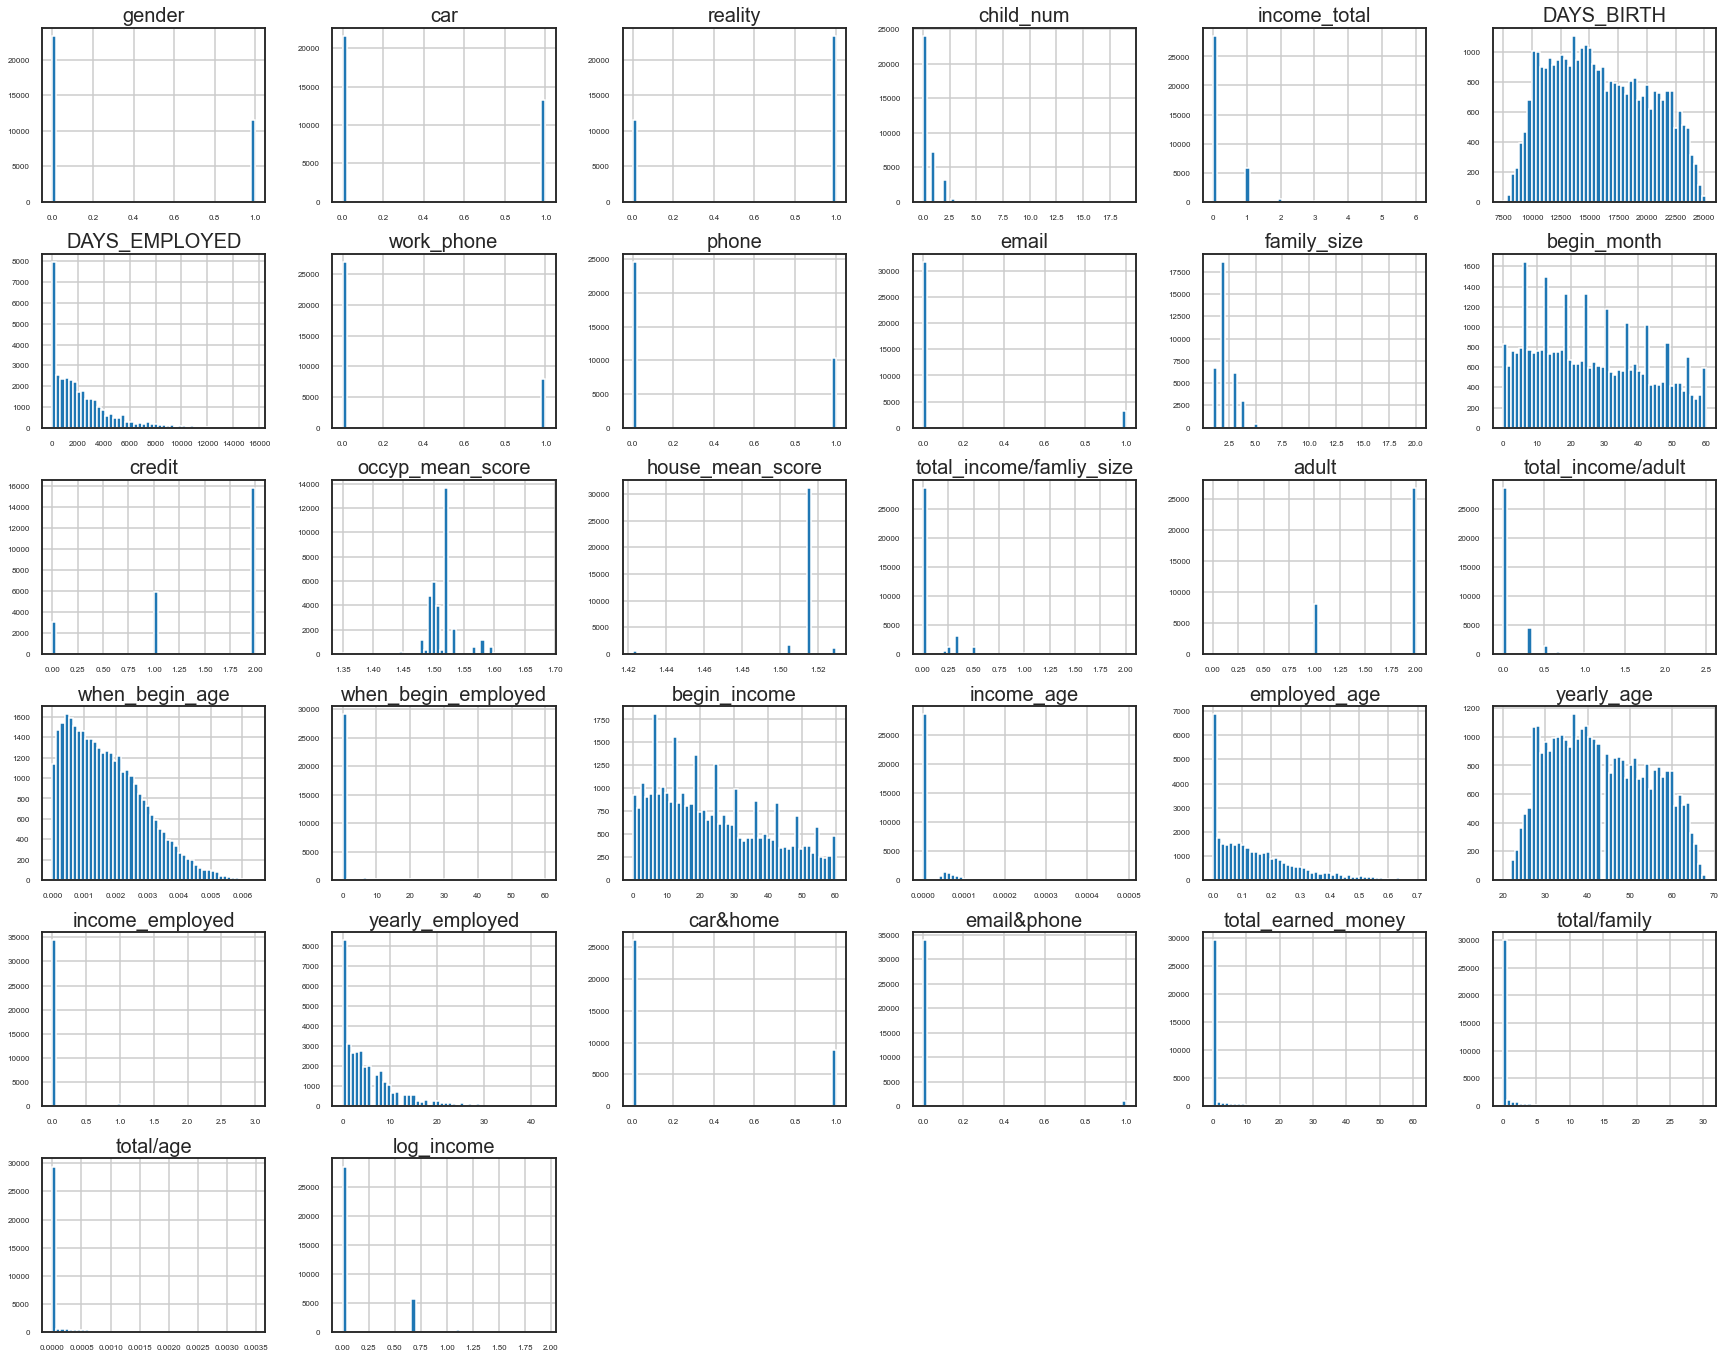

In [60]:
data.hist(bins=50, figsize=(30,24))
plt.show()

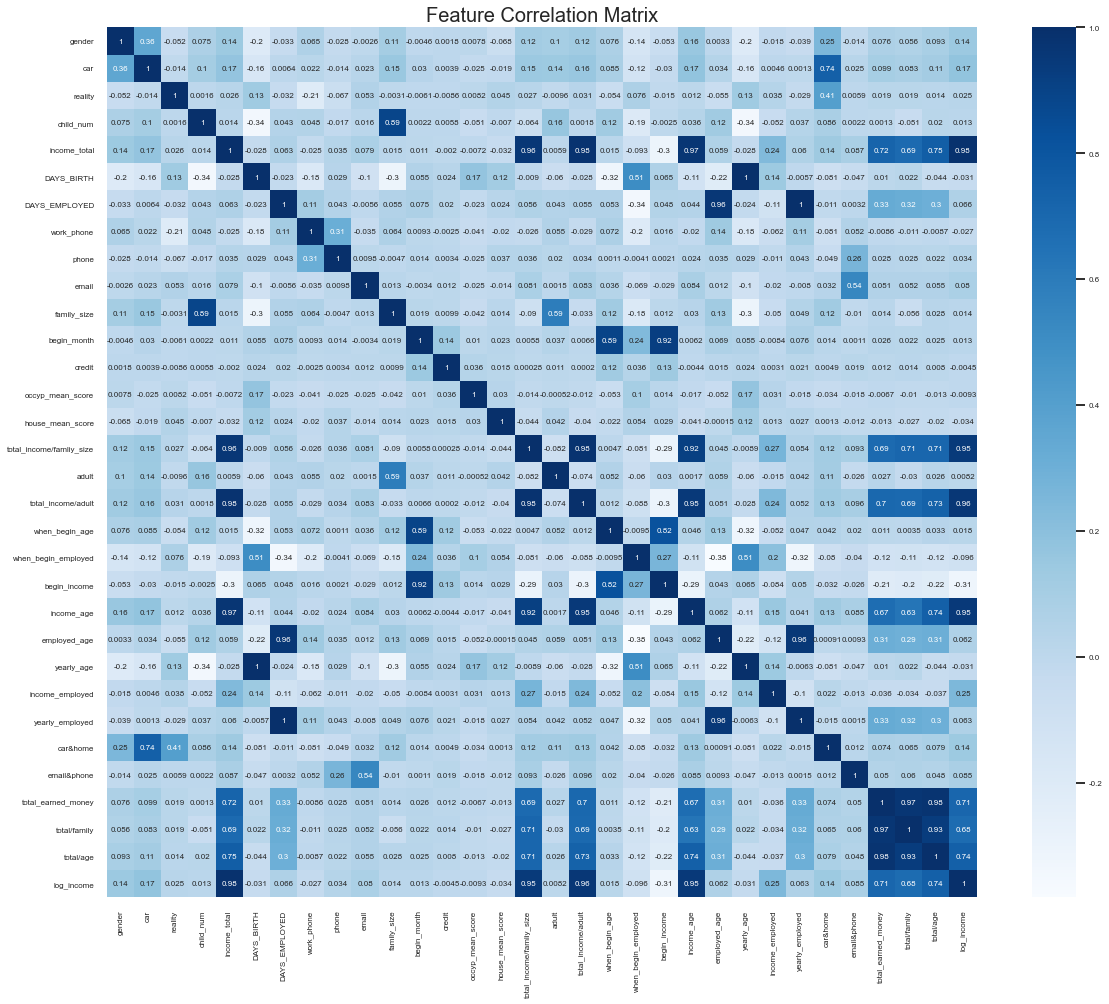

In [61]:
correlation_matrix = data.corr()
plt.figure(figsize=(20,16))
plt.rcParams.update({'font.size': 8})
plt.rc('axes', titlesize = 20) 
plt.rc('axes', labelsize = 10)
plt.rc('xtick', labelsize = 8)    
plt.rc('ytick', labelsize = 8)    
plt.rc('legend', fontsize = 8)    
plt.rc('figure', titlesize = 20)
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Feature Correlation Matrix')
plt.show()

In [62]:
corr_matrix = data.corr()
corr_matrix["credit"].sort_values(ascending=False)

credit                      1.000000
begin_month                 0.143323
begin_income                0.134648
when_begin_age              0.124076
occyp_mean_score            0.036388
when_begin_employed         0.035558
DAYS_BIRTH                  0.024332
yearly_age                  0.024203
yearly_employed             0.020952
DAYS_EMPLOYED               0.019905
email&phone                 0.019350
house_mean_score            0.018000
employed_age                0.014528
total/family                0.013942
email                       0.012133
total_earned_money          0.011904
adult                       0.011327
family_size                 0.009937
total/age                   0.008006
child_num                   0.005825
car&home                    0.004899
car                         0.003883
phone                       0.003388
income_employed             0.003144
gender                      0.001787
total_income/famliy_size    0.000281
total_income/adult          0.000202
i

# Data Preprocessing

## Label encoding (option 1)

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() # categorical 변수(문자로 되어있는 변수)들을 숫자로 인코딩해주는 함수
set(label_encoder.fit_transform(data['income_type'])) # income_type column에서 각 요소들을 숫자로 바꿔줌. fit_transform이 배열을 반환해서 unique()대신 set을 사용
data['income_type'] = label_encoder.fit_transform(data['income_type'])
data['edu_type'] = label_encoder.fit_transform(data['edu_type'])
data['family_type'] = label_encoder.fit_transform(data['family_type'])
data['house_type'] = label_encoder.fit_transform(data['house_type'])
data['occyp_type'] = label_encoder.fit_transform(data['occyp_type'])
data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,employed_age,yearly_age,income_employed,yearly_employed,car&home,email&phone,total_earned_money,total/family,total/age,log_income
0,0,0,0,0,0,0,1,1,2,13899,...,0.338777,38,0.000000,12,0,0,0.000000,0.000000,0.000000,0.000000
1,0,0,1,1,0,0,4,0,1,11380,...,0.135313,31,0.000000,4,0,0,0.000000,0.000000,0.000000,0.000000
2,1,1,1,0,1,4,1,1,1,19087,...,0.232293,52,0.000225,12,1,0,12.147945,4.049315,0.000636,0.693147
3,0,0,1,0,0,0,4,1,1,15088,...,0.138644,41,0.000000,5,0,0,0.000000,0.000000,0.000000,0.000000
4,0,1,1,0,0,2,1,1,1,15037,...,0.139979,41,0.000000,5,1,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,0,4,2,1,1,18593,...,0.292245,50,0.000000,14,1,0,0.000000,0.000000,0.000000,0.000000
9996,1,1,1,0,0,4,4,0,1,10886,...,0.120786,29,0.000000,3,1,0,0.000000,0.000000,0.000000,0.000000
9997,0,0,1,0,1,4,4,1,1,21016,...,0.666984,57,0.000071,38,0,0,38.405479,12.801826,0.001827,0.693147
9998,0,1,0,0,0,0,4,1,1,16541,...,0.065591,45,0.000000,2,0,0,0.000000,0.000000,0.000000,0.000000


## object type들 one-hot encoding (option 2)

In [63]:
def onehot_encoding(data, header):
    onehot = pd.get_dummies(data[header])
    data = data.drop([header], axis=1)
    data = pd.concat([data, onehot], axis=1)
    return data
data = onehot_encoding(data, "income_type")
data = onehot_encoding(data, "house_type")
data = onehot_encoding(data, "edu_type")
data = onehot_encoding(data, "family_type")
data = onehot_encoding(data, "occyp_type")

In [64]:
train=data[:len(data)-10000]
test=data[len(data)-10000:]
train_x = train.drop("credit", axis = 1)
train_y = train['credit']
test=test.drop('credit', axis=1)

### Feature selection

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier()
etc_model.fit(train_x, train_y)

print(etc_model.feature_importances_)
#featuer_importances의 순서대로 끝에서 몇개는 제외시키는 것으로 
#어느정도의 irrelevant feature는 걸러낼수 있을듯합니다

[0.01684534 0.01497063 0.01665797 0.01772635 0.00257564 0.06420561
 0.03501861 0.01421422 0.01926405 0.00946133 0.0189192  0.10771753
 0.01641694 0.00628905 0.00423637 0.0048367  0.00301139 0.11156982
 0.08355091 0.10360452 0.00653459 0.0356089  0.05532005 0.00582943
 0.0313016  0.01092524 0.00265092 0.00540506 0.0056509  0.00552088
 0.00263094 0.00783834 0.00197973 0.00565504 0.00011932 0.00892141
 0.00071888 0.00573136 0.00315201 0.00124958 0.00149168 0.00359724
 0.00025324 0.00887159 0.00409688 0.00147886 0.00921503 0.00530347
 0.0061919  0.00444098 0.00525668 0.00302491 0.00398757 0.00212218
 0.0033654  0.00766486 0.00520459 0.00047376 0.00537936 0.00045634
 0.00958053 0.00118398 0.00636486 0.00317302 0.00946356 0.00202284
 0.00051296 0.00733664 0.00112759 0.00221289 0.00130824]


In [66]:
def normalize(data, header):
    if header in data.columns:
        data[header] = (data[header] - data[header].mean()) / data[header].std()
    return data

numeric = ["income_total", "DAYS_BIRTH", "DAYS_EMPLOYED", "family_size", "begin_month", 
            "total_income/famliy_size", "adult", "total_income/adult", "when_begin_age",
            "when_begin_employed", "begin_income", "income_age", "employed_age", "yearly_age", 
            "income_employed", "yearly_employed", "total_earned_money", "total/family", "total/age", "log_income"]

for t in numeric:
    train_x = normalize(train_x, t)
    test = normalize(test, t)

In [67]:
train_x.describe(include='all')

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,...,Low-skill Laborers,Managers,Medicine staff,OTHER,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
count,24823.000000,24823.000000,24823.000000,24823.000000,2.482300e+04,2.482300e+04,2.482300e+04,24823.000000,24823.000000,24823.000000,...,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000
mean,0.331346,0.379487,0.672723,0.431052,-2.262220e-17,-8.673184e-17,-9.431730e-17,0.225235,0.294284,0.091528,...,0.004633,0.081537,0.032712,0.306691,0.009104,0.002337,0.095959,0.003787,0.016074,0.004754
std,0.470707,0.485269,0.469229,0.750627,1.000000e+00,1.000000e+00,1.000000e+00,0.417745,0.455729,0.288364,...,0.067908,0.273664,0.177884,0.461129,0.094984,0.048282,0.294541,0.061422,0.125762,0.068784
min,0.000000,0.000000,0.000000,0.000000,-4.405491e-01,-1.961080e+00,-9.271469e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-4.405491e-01,-8.342707e-01,-7.552638e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,-4.405491e-01,-9.915741e-02,-2.779983e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,-4.405491e-01,8.264527e-01,4.027852e-01,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,19.000000,1.267186e+01,2.188232e+00,5.700580e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
train_x.head(10)

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,...,Low-skill Laborers,Managers,Medicine staff,OTHER,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,0,0,0,-0.440549,-0.487999,1.059104,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,-0.440549,-1.087077,-0.277576,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1.744853,0.745830,0.943110,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,-0.440549,-0.205227,-0.044743,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,-0.440549,-0.217356,-0.039260,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,1,2,1.744853,-0.603582,1.180161,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1.744853,0.385052,-0.092829,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,0,1,0,1.744853,-0.250889,1.359003,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,-0.440549,-0.195000,-0.308790,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,0,0,1,0,-0.440549,-0.039464,-0.375434,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Model Selection

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier, plot_importance
import torch
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier

def model_experiment(tx, ty):
    logloss = {}
    logloss["Gradient Boosting"] = {}
    logloss["Light GBM"] = {}
    logloss["TabNet"] = {}

    X_train, X_val, Y_train, Y_val = train_test_split(tx, ty,stratify=ty, test_size=0.25, random_state=10086)
    y_val_onehot = pd.get_dummies(Y_val)

    print("Start Gradient Boosting")
    gb_param_grid = {
        'n_estimators' : [100, 200],
        'max_depth' : [8, 10, 12],
        'min_samples_leaf' : [5, 7, 10],
        'min_samples_split' : [2, 3, 5],
        'learning_rate' : [0.05, 0.1, 0.2]
    }
    gb = GradientBoostingClassifier()
    gb.fit(X_train, Y_train)
    predict = gb.predict_proba(X_val)
    logloss["Gradient Boosting"] = {"model" : gb, "logloss" : log_loss(y_val_onehot, predict)}
    print("End Gradient Boosting")

    print("Start Light GBM")
    lgb = LGBMClassifier(boosting="dart", metric="multiclass", n_estimators=1800, feature_fraction=0.5, bagging_fraction=0.5)
    lgb.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], verbose=100)
    predict = lgb.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(Y_val)
    logloss["LGBM"] = {"model" : lgb, "logloss" : log_loss(y_val_onehot, predict)}
    print("End Light GBM")

    return logloss

In [75]:
logloss = model_experiment(train_x, train_y)
print(logloss)

Start Gradient Boosting
End Gradient Boosting
Start Light GBM
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[100]	training's multi_logloss: 0.732217	valid_1's multi_logloss: 0.798951
[200]	training's multi_logloss: 0.698107	valid_1's multi_logloss: 0.792159
[300]	training's multi_logloss: 0.664775	valid_1's multi_logloss: 0.787932
[400]	training's multi_logloss: 0.633578	valid_1's multi_logloss: 0.787594
[500]	training's multi_logloss: 0.601987	valid_1's multi_logloss: 0.787835
[600]	training's multi_logloss: 0.58847	valid_1's multi_logloss: 0.787997
[700]	training's multi_logloss: 0.565864	valid_1's multi_logloss: 0.789453
[800]	training's multi_logloss: 0.550392	valid_1's multi_logloss:

In [76]:
class_weights = 1.0 / train_y.value_counts()
class_weights = torch.Tensor(class_weights.to_numpy()).cuda()
class_weights

tensor([5.1732, 1.9389, 1.0000], device='cuda:0')

In [78]:
X_train, X_val, Y_train, Y_val = train_test_split(train_x, train_y,stratify=train_y, test_size=0.25, random_state=10086)
y_val_onehot = pd.get_dummies(Y_val)

unsupervised_model = TabNetPretrainer(
    n_d=16, n_a=16, n_steps=5,
    lambda_sparse=1e-2,
    gamma = 1.3,
    optimizer_fn = torch.optim.Adam,
    optimizer_params = dict(lr=2e-2),
    scheduler_params = {"gamma": 0.9, "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    device_name='cuda'
)
unsupervised_model.fit(
    X_train = X_train.values,
    eval_set = [X_val.values],
    pretraining_ratio=0.8
)
clf = TabNetMultiTaskClassifier(
    n_d=16, n_a=16, n_steps=5,
    lambda_sparse=1e-2,
    gamma = 1.3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),
    scheduler_params = {"gamma": 0.8, "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    device_name='cuda'
)
clf.fit(
X_train = X_train.values, y_train = np.array(Y_train).reshape(Y_train.shape[0],1),
    eval_set = [(X_val.values, np.array(Y_val).reshape(Y_val.shape[0],1))],
    max_epochs=300,
    patience=50,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    loss_fn = torch.nn.CrossEntropyLoss(class_weights),
    from_unsupervised=unsupervised_model,
    drop_last=False
)
predict = clf.predict_proba(X_val.values)
log_loss(y_val_onehot, predict[0])

Device used : cuda
epoch 0  | loss: 33389357.12678| val_0_unsup_loss: 163.47166|  0:00:02s
epoch 1  | loss: 6928080.7069| val_0_unsup_loss: 129.9427|  0:00:05s
epoch 2  | loss: 1957236.64683| val_0_unsup_loss: 30.47393|  0:00:08s
epoch 3  | loss: 646129.64535| val_0_unsup_loss: 40.85931|  0:00:10s
epoch 4  | loss: 231701.75325| val_0_unsup_loss: 10.3861 |  0:00:13s
epoch 5  | loss: 38999.55909| val_0_unsup_loss: 30.06264|  0:00:15s
epoch 6  | loss: 36274.91917| val_0_unsup_loss: 4.68408 |  0:00:18s
epoch 7  | loss: 74451.12285| val_0_unsup_loss: 11.0019 |  0:00:21s
epoch 8  | loss: 26373.35949| val_0_unsup_loss: 2.63044 |  0:00:23s
epoch 9  | loss: 23416.92021| val_0_unsup_loss: 7.63804 |  0:00:26s
epoch 10 | loss: 17822.89676| val_0_unsup_loss: 6.10003 |  0:00:28s
epoch 11 | loss: 12687.92526| val_0_unsup_loss: 37.06325|  0:00:31s
epoch 12 | loss: 10671.51794| val_0_unsup_loss: 50.31026|  0:00:34s
epoch 13 | loss: 9568.26597| val_0_unsup_loss: 30.06129|  0:00:37s
epoch 14 | loss: 3707

ValueError: Found array with dim 3. Estimator expected <= 2.

In [93]:
predict = clf.predict_proba(test.values)

In [95]:
i, j, k = [], [], []
for row in range(10000):
  i.append(predict[0][row][0])
  j.append(predict[0][row][1])
  k.append(predict[0][row][2])

len(i), len(j), len(k)
submission = pd.read_csv("datasets/sample_submission.csv")
submission['0'] = i
submission['1'] = j
submission['2'] = k
submission.head(10)

,index,0,1,2
0,26457,0.127674,0.352821,0.519506
1,26458,0.491692,0.172754,0.335554
2,26459,0.264395,0.246672,0.488933
3,26460,0.137494,0.287106,0.575400
4,26461,0.202316,0.301616,0.496069
5,26462,0.164515,0.424144,0.411341
6,26463,0.786075,0.211745,0.002180
7,26464,0.517908,0.184011,0.298081
8,26465,0.126518,0.258081,0.615401
9,26466,0.345562,0.229969,0.424470


In [96]:
submission.to_csv("datasets/submisison_tabnet.csv",index=False)